## API sobre datos de transporte

En este ejemplo vamos a conectarnos con una [API Transporte](https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte) del Gobierno de la Ciudad que nos da información del transporte, como por ejemplo estado del trańsito y estado actual del subte.

Este tipo de APIs son quizás las más aprovechables a la hora de pensar en desarrollar una aplicación, dado que los datos no son estáticos sino que se van actualizando a cada momento. Piensen en servicios que reciben la ubicación de los colectivos y devuelve esa información volcada en un mapa, o bien que calcule el tiempo de recorrido dado el estado del tránsito en tiempo real. Estos datos combinados con las herramientas y modelos vistos en la materia le dan un valor más que interesante.

Para usar esta API tienen que registrarse [aquí](https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte), con lo cual obtienen las claves *client_id* y *client_secret* que en este caso (según la documentación) se pasan como parámetros en cada request.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Esta librería no viene por default y hay que instalarla con "pip"
# Por lo tanto al cargarla es muy probable que se vean varias leyendas del proceso de instalación
!pip install geopandas
import geopandas as gpd

import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos la librería requests y json para formatear la salida
import requests
import json

# Solamente hace falta client_id y client_secret
# Se sacan registrandose en
# https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte

client_id = "18b8b37c9d5f4e39a5dd0f41ba5c925f"
client_secret = "77F1e9f202eC4cEDb106191f62Ac7e92"

# Estas claves van a ser borradas proximamente, generar sus propias claves

### Ejemplos de uso

La forma general de comunicarse con esta API es la siguiente:
~~~
"https://apitransporte.buenosaires.gob.ar" + end_point
~~~
donde *end_point* los pueden tomar de la [documentación](https://www.buenosaires.gob.ar/desarrollourbano/transporte/apitransporte/api-doc).

Todos los parámetros que necesiten (además de que siempre vamos a tener que pasarle las claves) van al diccionario de parámetros.

#### Posición de colectivos monitoreados

In [ ]:
# Claves como parametros, mas los parametros propios de cada endpoint
# Aquí tenemos que pedirle explícitamente que nos devuelva los datos en json
params = {'client_id': client_id, 'client_secret': client_secret, 'json': 1, 'agency_id': 2}

# Url y end point (lo vemos siempre en la documentación)
url = "https://apitransporte.buenosaires.gob.ar"
end_point = "/colectivos/vehiclePositions"

# Método get
response = requests.get(url + end_point, params = params)

# Respuesta en formato json
json_data = response.json()

# Llamamos a dumps para que la salida sea más fácil de leer
print(json.dumps(json_data, indent = 4))

{
    "_entity": [
        {
            "_alert": null,
            "_id": "1",
            "_is_deleted": false,
            "_trip_update": null,
            "_vehicle": {
                "_congestion_level": 0,
                "_current_status": 2,
                "_current_stop_sequence": 0,
                "_occupancy_status": 0,
                "_position": {
                    "_bearing": 0,
                    "_latitude": -34.57418,
                    "_longitude": -58.40896,
                    "_odometer": 82574,
                    "_speed": 0,
                    "extensionObject": null
                },
                "_stop_id": null,
                "_timestamp": 1622243402,
                "_trip": null,
                "_vehicle": {
                    "_id": "33871",
                    "_label": "16-156",
                    "_license_plate": null,
                    "extensionObject": null
                },
                "extensionObject": null
           

###### Ejemplo de utilización de estos datos:

Text(0, 0.5, 'LATITUD')

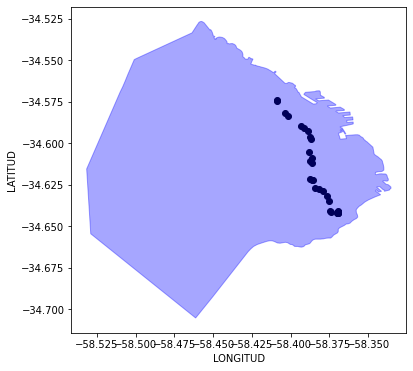

In [ ]:
# Datos de los límites de diferentes municipios del país levantados con geopandas
data_muni = gpd.read_file('/content/drive/My Drive/LaboDatos2021/ign_municipio.shp')

# Creamos la figura con matplotlib
fig, ax = plt.subplots(figsize = (6, 6))

# Función para plotear la superficie de CABA (el índice es simplemente el correspondiente a la ciudad de Buenos Aires)
# No enroscarse con esto, ya veremos cómo manejar este tipo de datos
ax.fill(*data_muni.iloc[704]['geometry'].exterior.xy, color = 'b', alpha = 0.35)

# Estos son los datos que sacamos de la API:
# La posición de los colectivos pedidos
for entity in json_data['_entity']:
  x = entity['_vehicle']['_position']['_longitude']
  y = entity['_vehicle']['_position']['_latitude']
  ax.scatter(x, y, color = 'k')

# Labels de los ejes
ax.set_xlabel('LONGITUD')
ax.set_ylabel('LATITUD')

#### Estado de estaciones de EcoBici

In [ ]:
# Claves como parametros, mas los parametros propios de cada endpoint
params = {'client_id': client_id, 'client_secret': client_secret}

# Url y end point (lo vemos siempre en la documentación)
url = "https://apitransporte.buenosaires.gob.ar"
end_point = "/ecobici/gbfs/stationStatus"

# Método get
response = requests.get(url + end_point, params = params)

# Respuesta en formato json
json_data = response.json()

# Llamamos a dumps para que la salida sea más fácil de leer
print(json.dumps(json_data, indent = 4))

{
    "last_updated": 1622242978,
    "ttl": 23,
    "data": {
        "stations": [
            {
                "station_id": "2",
                "num_bikes_available": 5,
                "num_bikes_available_types": {
                    "mechanical": 5,
                    "ebike": 0
                },
                "num_bikes_disabled": 0,
                "num_docks_available": 15,
                "num_docks_disabled": 0,
                "last_reported": 1622242943,
                "is_charging_station": false,
                "status": "IN_SERVICE",
                "is_installed": 1,
                "is_renting": 1,
                "is_returning": 1
            },
            {
                "station_id": "3",
                "num_bikes_available": 0,
                "num_bikes_available_types": {
                    "mechanical": 0,
                    "ebike": 0
                },
                "num_bikes_disabled": 0,
                "num_docks_available": 20,
        

#### Cortes de tránsito

In [ ]:
# Claves como parametros, mas los parametros propios de cada endpoint
params = {'client_id': client_id, 'client_secret': client_secret}

# Url y end point (lo vemos siempre en la documentación)
url = "https://apitransporte.buenosaires.gob.ar"
end_point = "/transito/v1/cortes"

# Método get
response = requests.get(url + end_point, params = params)

# Respuesta en formato json
json_data = response.json()

# Llamamos a dumps para que la salida sea más fácil de leer
print(json.dumps(json_data, indent = 4))

{
    "incidents": [
        {
            "id": "batransito-2207485-Closure-3059",
            "parent_event": "batransito-2207485",
            "type": "ROAD_CLOSED",
            "description": "Buenos Aires:  en \u00c1rea Buenos Aires en SARMIENTO (E) en MONTEVIDEO (batransito)",
            "location": {
                "street": "Montevideo",
                "polyline": "-34.60781478881836 -58.3892707824707 -34.60907745361328 -58.38917541503906 ",
                "direction": "ONE_DIRECTION"
            },
            "reference": "batransito",
            "creationtime": "2021-05-27T12:17:29-03:00",
            "updatetime": "2021-05-28T10:50:15-03:00",
            "starttime": "2021-05-27T12:17:41-03:00",
            "endtime": "2021-05-28T12:17:41-03:00"
        },
        {
            "id": "batransito-2207323-Closure-3051",
            "parent_event": "batransito-2207323",
            "type": "ROAD_CLOSED",
            "description": "Buenos Aires: Debido a Servicio p\u00fab